In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import scipy.stats as stats

In [2]:

###################################
class SmartphonePricePrediction:
        # Выбираем подходящую модель
    def __init__(self, model):
        self.model = model

        # Проводим первичную загрузку набора данных и получаем по нему основную информацию
    def first_view(self, csv_file):
        df = pd.read_csv(csv_file)
        return df.info(), df.describe()

        # Загружаем набор данных для последующей подготовки и анализа данных
    def data_loader(self, csv_file):
        dataframe = pd.read_csv(csv_file)
        return dataframe
        # Приводим данные в порядок, избавляясь от выбросов снизу и сверху
    def fitting(self, dataframe):
        df = dataframe.sort_values('weight')
        #df = df.sort_values('weight')
        df2 = df.describe()
        Q1 = df2.at["25%", "weight"]
        Q3 = df2.at["75%", "weight"]
        IQR = Q3 - Q1
        data_clear = df.query(f"weight >= {Q1 - 1.5*IQR} and weight <= {Q3 + 1.5*IQR}")
        return data_clear

         # Визуальный анализ датасета
    def data_analys(self, data_clear):

      # Вывод ряда распределений между характеристиками телефонов
        df = data_clear
        #df = pd.read_csv(dff)
        cols = ["Price", 'cpu core', 'weight', 'ppi', 'battery', 'thickness', 'ram']
        sns_plot = sns.pairplot(df[cols])
        sns_plot.savefig('pairplot.png')

      # Построение и вывод корреляционной матрицы
        plt.figure(figsize=(8,8))
        corr = round(df.drop(["Product_id"], axis =1 ).corr(),2)
        mask = np.zeros_like(corr)
        mask[np.triu_indices_from(mask)] = True
        sns.heatmap(corr, mask=mask, linewidths=.5, annot=True, cmap = "Spectral")
        plt.show()

      # Построенние гистограмм распределения телефонов по характеристикам
        features = list(set(df.columns) - set(['cpu freq', 'Front_Cam', 'RearCam', 'Product_id', 'internal_mem']))

        df[features].hist(figsize=(20,12));

      # Построенние гистограммы распределения телефонов по стоимости
        sns.displot(df.Price)

    def data_preparing(self, data_clear):
        df = data_clear  #читаем файл
        y = df['Price']         #колонка цены
        X = df.drop('Price', axis=1)   # все кроме цены
        X = X.values
        y = y.values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   #сплитим дату
        return X_train, X_test, y_train, y_test


    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)    # учим

    def predict(self, X_test):
        y_pred = self.model.predict(X_test)  # предсказываем несколько
        return y_pred

    # Визуализация результатов предикта стоимости телефонов
    def visualizer(self, y_test, y_pred):
        plt.figure(figsize=(10,7))
        plt.scatter(y_test, y_pred)
        plt.plot([y_test.min(), y_pred.max()], [y_test.min(), y_train.max()], "k--", color = "red")
        plt.xlabel('Actual', weight = "bold")
        plt.ylabel('Predicted',  weight = "bold")
        plt.grid(color='black', linestyle='--', linewidth=0.2)
        plt.title('Actual value vs Predicted value')
        plt.show()
        print(f"Mean Squared Error:', {mean_squared_error(y_test, y_pred)}, R2 score: {r2_score(y_test, y_pred)}")












In [3]:
smartphone_model = SmartphonePricePrediction(LinearRegression())
# Загружаем набор данных для последующей подготовки и анализа
data = smartphone_model.data_loader(r"Cellphone.csv")

In [4]:
# Подготовка качественных данных для анализа
data_clear = smartphone_model.fitting(data)

In [5]:
# Подготовка к обучению модели
X_train, X_test, y_train, y_test = smartphone_model.data_preparing(data_clear)

In [6]:
# Тренировка и обучение модели
smartphone_model.fit(X_train, y_train)

In [14]:
y_pred = smartphone_model.predict(X_test)

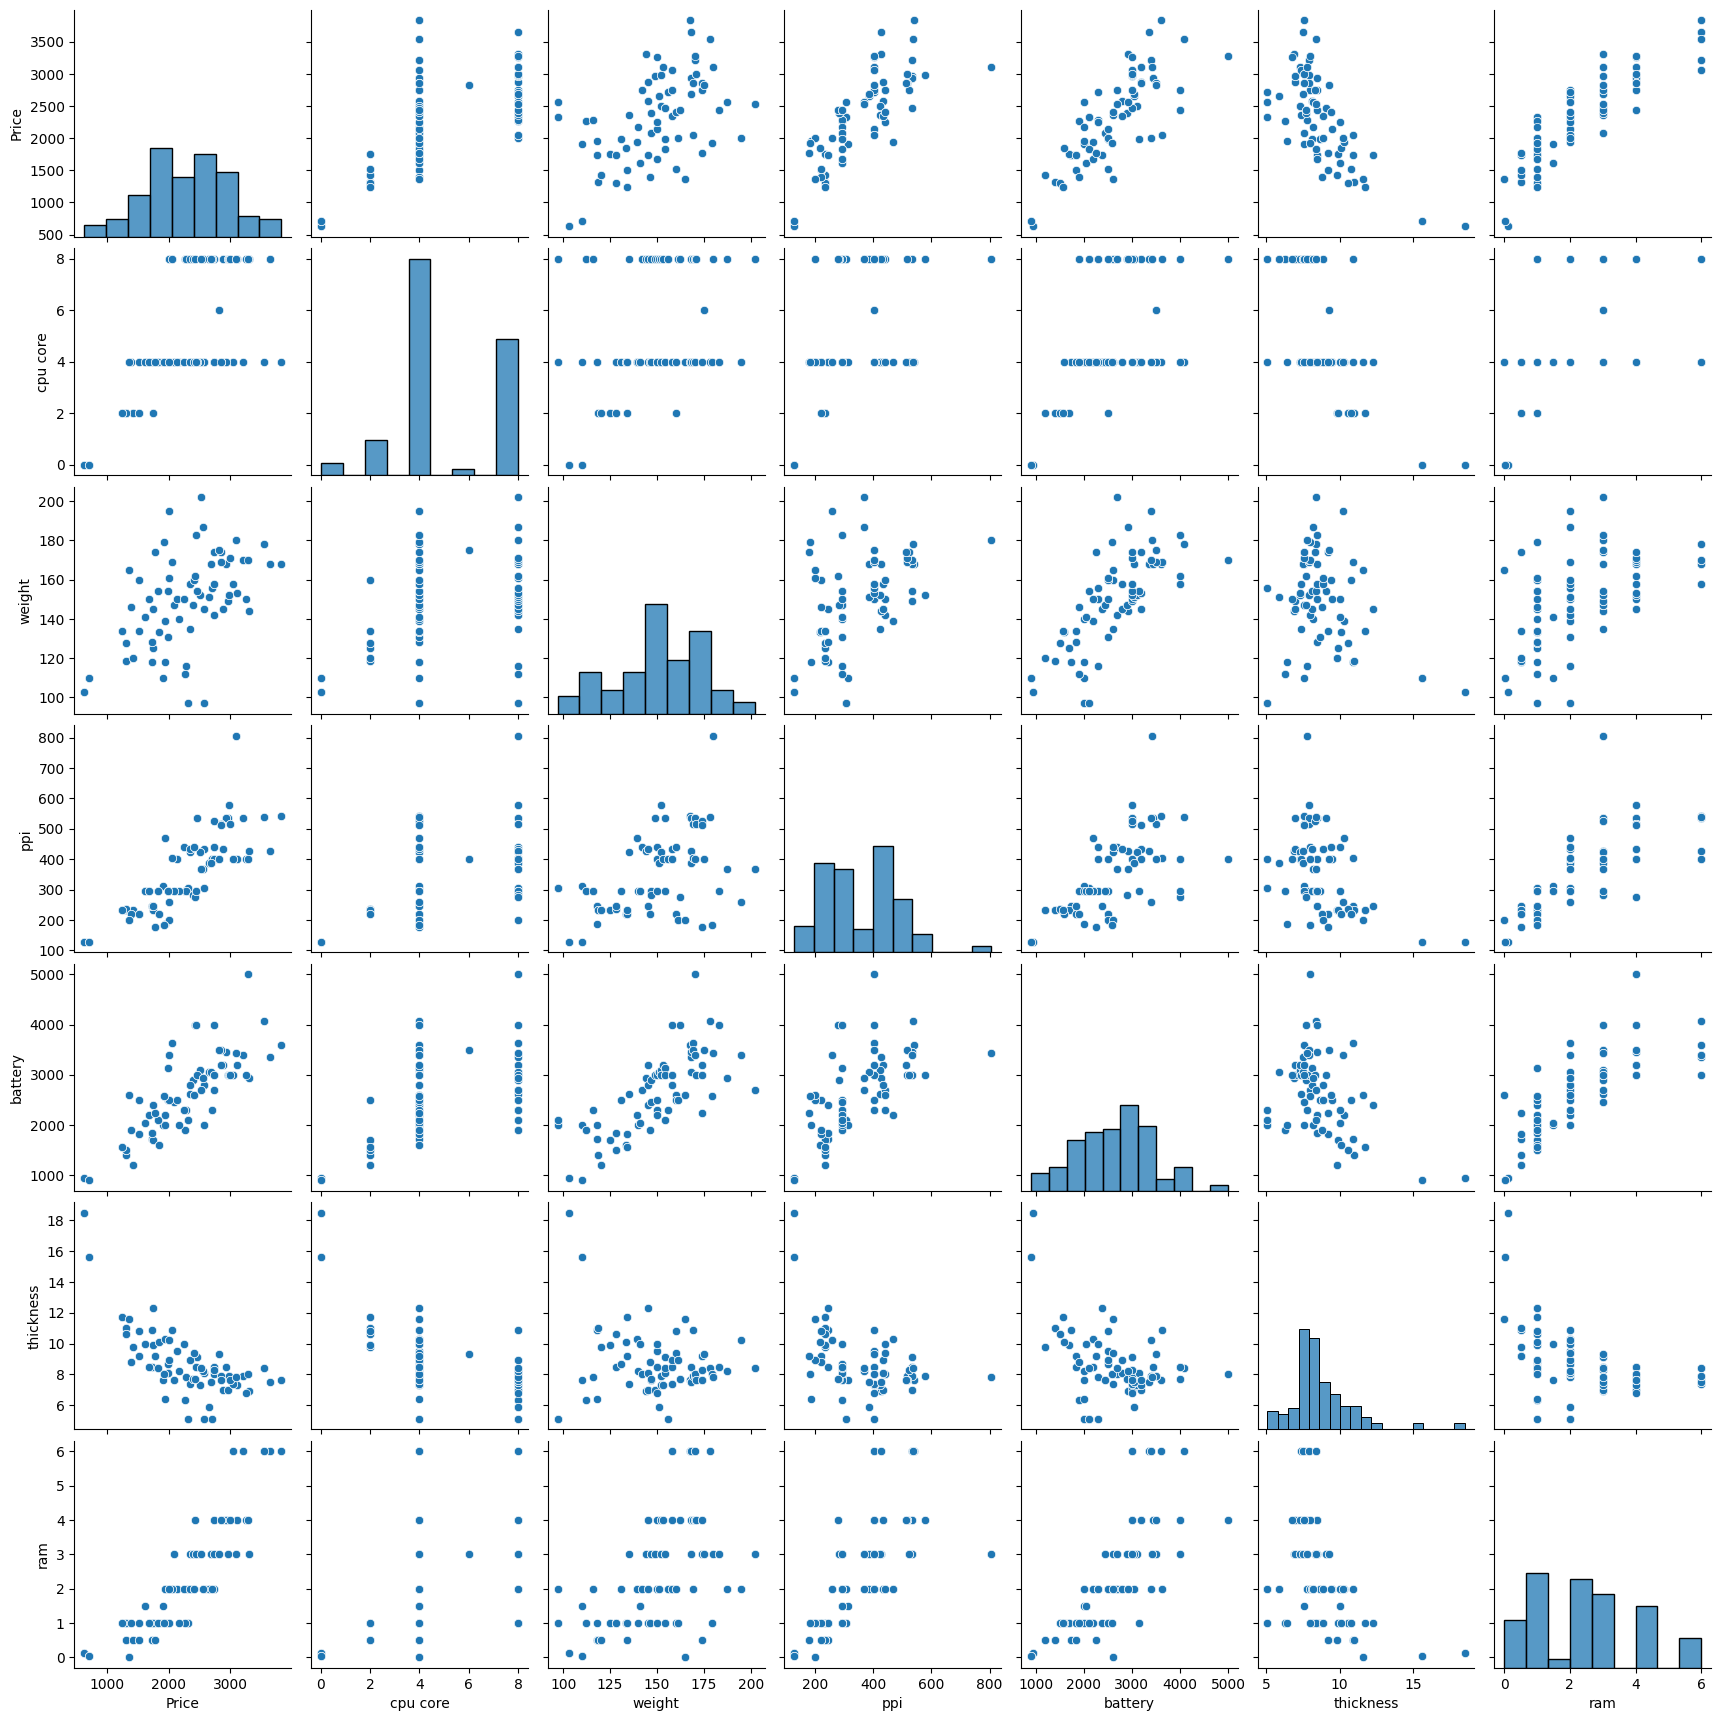

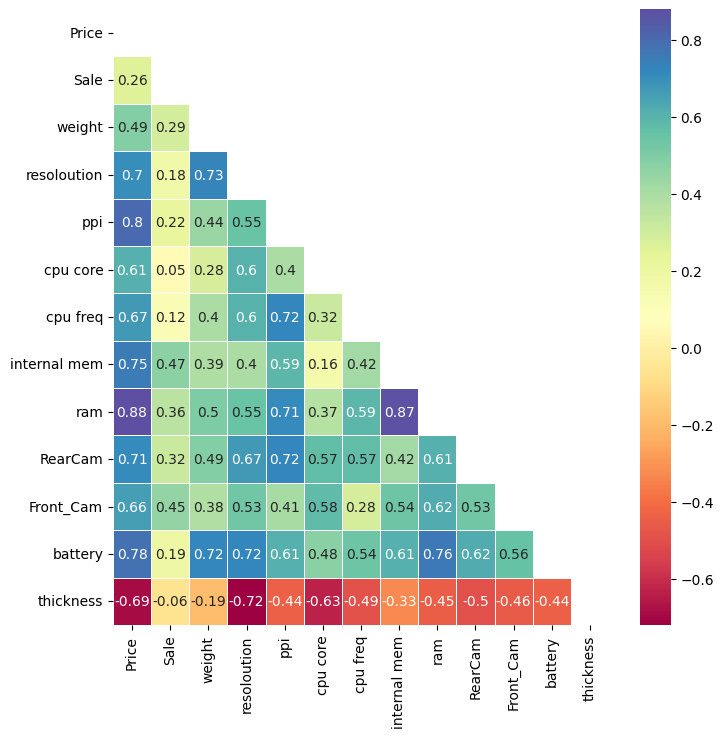

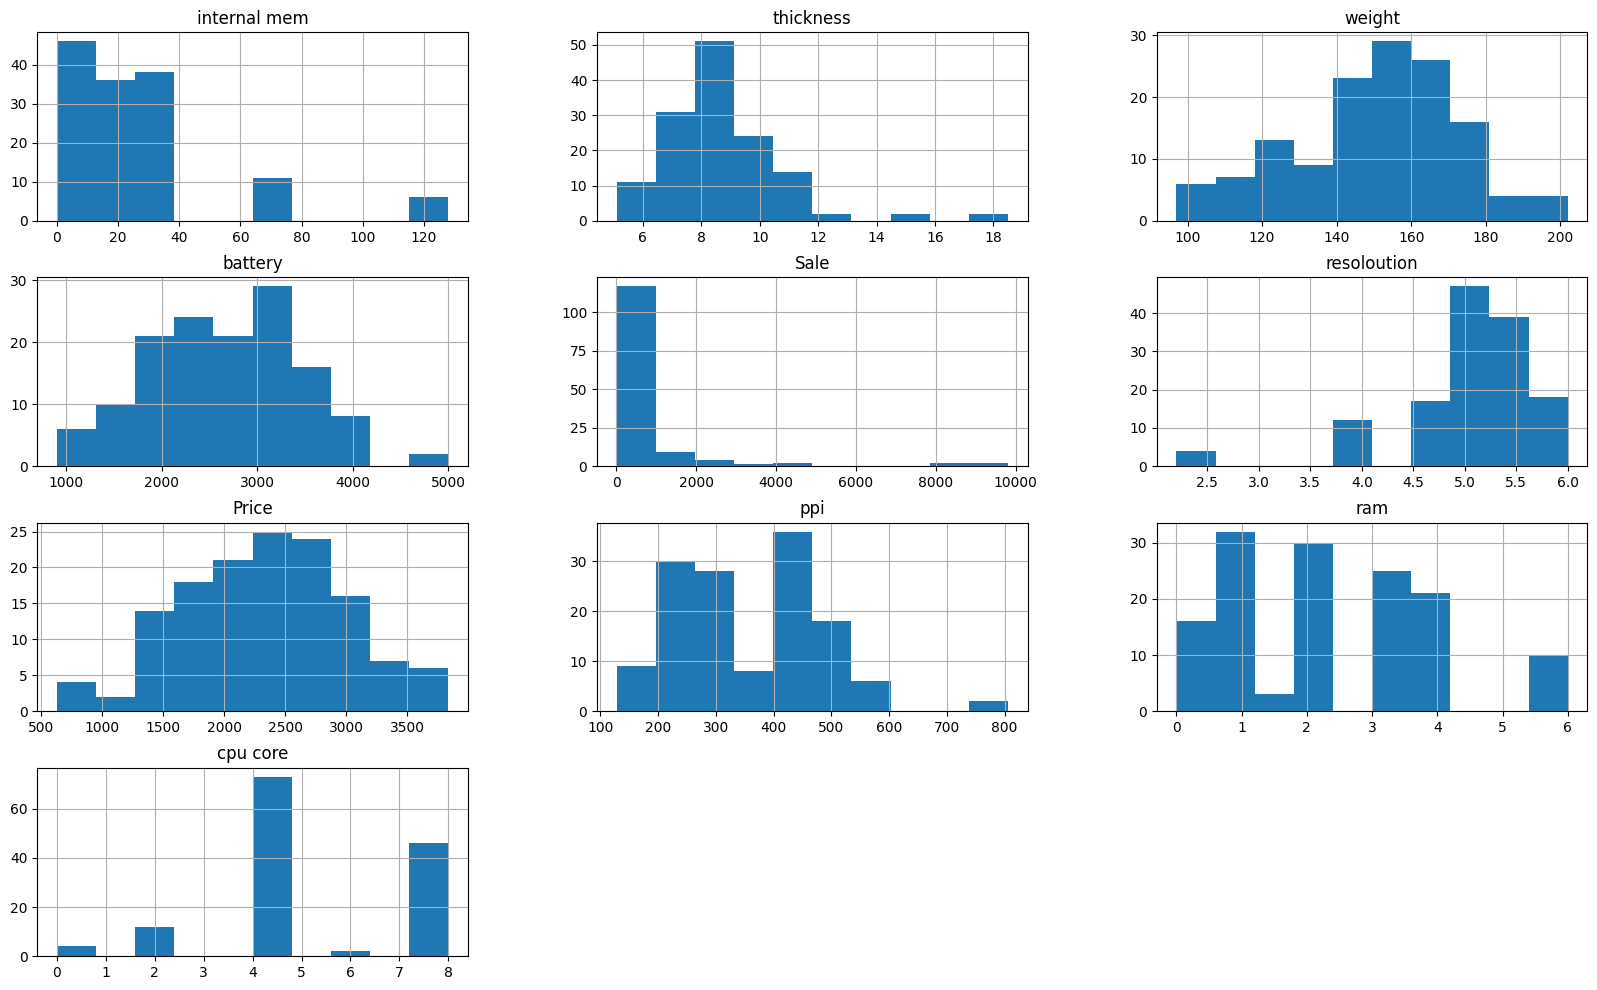

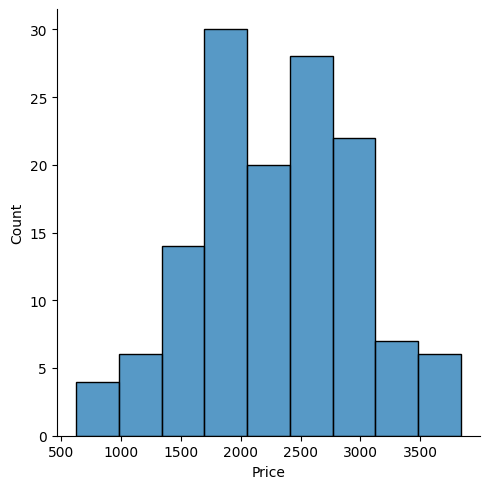

In [8]:
# Вывод визуального анализа
smartphone_model.data_analys(data_clear)

<ipython-input-2-48bf342b85bc>:74: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_pred.max()], [y_test.min(), y_train.max()], "k--", color = "red")


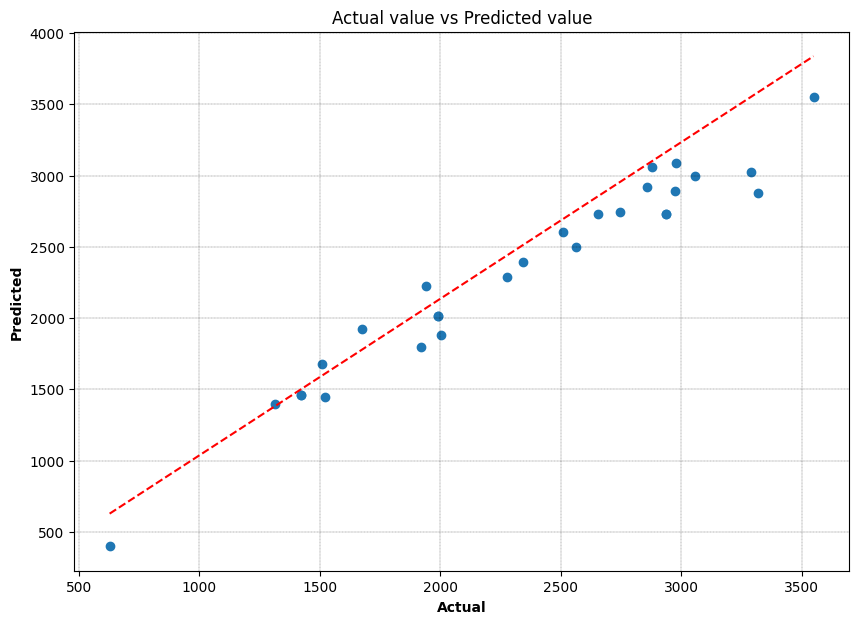

Mean Squared Error:', 24840.649614355916, R2 score: 0.951749932073796


In [11]:
# Вывод результатов работы алгоритма и анализ результатов
smartphone_model.visualizer(y_test, y_pred)

In [12]:
print("Test_values =", y_pred[:5])
print("Predicted_values =", y_test[:5])
print(f"MSE =  {mean_squared_error(y_test, y_pred)}")
print(f"R2 score = {r2_score(y_test, y_pred)}")
#print(smartphone_model.predict_one([[880,10,125,4,233,2,1.3,4,1,3.15,0,1700,9.9]]))

Test_values = [2921.54171605 2730.78524642 2291.40891152 2017.68337148 3548.29279339]
Predicted_values = [2859 2938 2276 1989 3551]
MSE =  24840.649614355916
R2 score = 0.951749932073796
